In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# define numSim as the number of replications
numSim = 1

# define numCus as the number of customers
numCus = 2 ** 10

# define the arrival rate, lam
lam = 1

# define the service rate, mu
mu = 1

In [3]:
for i in range(numSim):

    # set A, T, and S equal to 0 for each step
    A = [0] * numCus  #arrival times
    T = [0] * numCus  #start of service times
    S = [0] * numCus  #service durations
    D = [0] * numCus  #completion times
    W = [0] * numCus  #waiting times
    I = [0] * numCus  #cumulative idle time of server

    # Iniitalzie system with first customer
    A[0] = np.random.exponential(1)
    T[0] = A[0]
    S[0] = np.random.exponential(1/2)
    D[0] = S[0]
    I[0] = T[0]


    #iterate over the remaining customers
    for n in range(1, numCus):

        # customer n's arrival time is the last arrival time plus a random inter-arrival time
        A[n] = A[n-1] + np.random.exponential(1)
        # customer n's start of service time is the maximum between their arrival time and the time customer n-1 completed service
        T[n] = max(A[n], T[n-1] + S[n-1])
        # generate customer n's service duration
        S[n] = np.random.exponential(1/2)

        W[n] = T[n] - A[n]
        D[n] = T[n] + S[n]

        I[n] = I[n-1] + T[n] - D[n-1]



In [4]:
print("Customers in the queueing model:")
print('\t', end='')
for val in ['A', 'T', 'S', 'D', 'W', 'I']:
    print(val, end='\t\t')
print()
for n in range(numCus - 11, numCus):
    print(str(n+1) + ' :', end='\t')
    print(str(round(A[n], 1)), end='\t\t')
    print(str(round(T[n], 1)), end='\t\t')
    print(str(round(S[n], 1)), end='\t\t')
    print(str(round(D[n], 1)), end='\t\t')
    print(str(round(W[n], 1)), end='\t\t')
    print(str(round(I[n], 1)), end='\t\t')
        
    print()

Customers in the queueing model:
	A		T		S		D		W		I		
1014 :	996.8		997.7		1.5		999.2		0.9		472.0		
1015 :	1001.5		1001.5		1.4		1002.9		0.0		474.3		
1016 :	1002.9		1002.9		0.1		1003.0		0.0		474.4		
1017 :	1004.6		1004.6		0.6		1005.3		0.0		476.0		
1018 :	1006.6		1006.6		0.4		1007.0		0.0		477.3		
1019 :	1006.8		1007.0		0.7		1007.7		0.2		477.3		
1020 :	1007.1		1007.7		1.3		1009.0		0.6		477.3		
1021 :	1007.4		1009.0		0.0		1009.1		1.7		477.3		
1022 :	1008.6		1009.1		0.8		1009.9		0.5		477.3		
1023 :	1009.1		1009.9		0.4		1010.3		0.9		477.3		
1024 :	1009.2		1010.3		0.1		1010.4		1.2		477.3		


In [5]:
print('Observed utilization: ' + str(1 - I[-1]/D[-1]))
print('Observed idleness: ' + str(I[-1]/D[-1]))

print('Average wait: '+ str(np.mean(W)))


Observed utilization: 0.5276449266782018
Observed idleness: 0.47235507332179816
Average wait: 0.558749434173093


In [6]:
##Let's compute the actual queue length at different times

#this is when the last customer finishes service
maxTime = D[-1]

time_grid = np.linspace(0, maxTime, num=100)  # create a time grid from 0 to maxTime with 100 points
queue = np.zeros(len(time_grid))  # initialize the queue length array

for i in range(len(time_grid)):
    t = time_grid[i]

    # Count the number of arrivals and departures up to time t
    arrivals = np.sum(A < t)  # number of arrivals before time t
    departures = np.sum(D < t)  # number of departures before time t
    queue[i] = arrivals - departures  # queue length at time t

    #we need to account for the person that might be in service at time t
    queue[i] = max(0, queue[i] - 1)

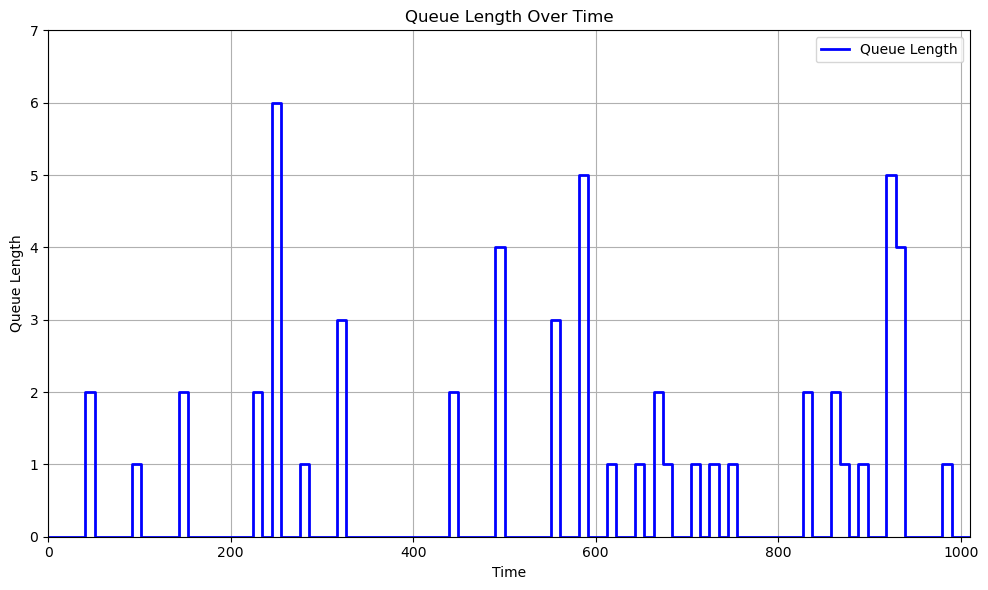

In [10]:
#plot the queue length over time with piecewise constant interpolation
plt.figure(figsize=(10, 6))
plt.step(time_grid, queue, where='post', label='Queue Length', color='blue', linewidth=2)
plt.title('Queue Length Over Time')
plt.xlabel('Time')
plt.ylabel('Queue Length')
plt.xlim(0, maxTime)
plt.ylim(0, np.max(queue) + 1)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()



In [8]:
print(np.mean(queue))
print(lam * np.mean(W))

print(1*(np.mean(S) + np.mean(W)))

0.55
0.558749434173093
1.0803561936674992
